<a href="https://colab.research.google.com/github/victor-MMN/RedNeuronalConvolucional/blob/main/EvalParcial_SFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minjares Neriz Victor Manuel 


---

---



##  Seleccion de la muestra:

En este trabajo usaremos un dataset en el cual se tiene registado como 5 robots diferentes, los cuales se llaman **0,1,2,3,4 **, dicen  series de numeros, en total diez. El objetivo es que nuestra red neuronal pueda predecir cual de los 5 robots dijo las series de numeros dadas.

El dataframe cuenta con 500001 datos y 11 columnas, la primera nos indica el nombre o numero del robot, source. En cada una de las diez restantes se encuentra una de las series de numeros que dijo el cada robot, 1,2,..,10.

Ejemplo:


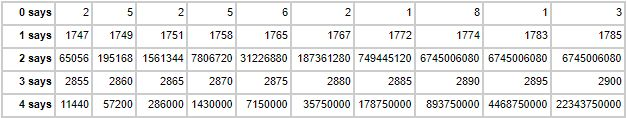


<strong> Data set obtenido de kaggle:</strong> https://www.kaggle.com/msk1097/classification-of-robots-from-their-conversation

In [ ]:
#Primeramente debemos crear un APK en kaggle, nos dara un archivo kaggle.json y eso lo subimos a google colab en este bloque de codigo.
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"victorminjares","key":"112ab805aae61c17b52c691948269c28"}'}

In [ ]:
# comandos para permitir que google descargue datos de kaggle. 
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
# debemos verificar que nuestro disco gdrive este montado.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Descargar la muestra de datos deseada de kaggle.
!kaggle datasets download -d msk1097/classification-of-robots-from-their-conversation -p /content/drive/MyDrive/computacional/examen1

classification-of-robots-from-their-conversation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Por ultimo descomprimir el archivo .zip, debe tener la misma estructura que en la pagina de kaggle.
import os 
os.chdir("/content/drive/MyDrive/computacional/examen1")
!unzip -q classification-of-robots-from-their-conversation.zip

In [ ]:
# Importamos paqueteria para manipulacion de dataframe y lo leemos.
import pandas as pd 
df = pd.read_csv("/content/drive/MyDrive/computacional/examen1/Classification of Robots from their conversation sequence.csv")
df.head(10)

,source,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10
0,0,2,5,2,5,6,2,1,8,1,3
1,1,1747,1749,1751,1758,1765,1767,1772,1774,1783,1785
2,2,65056,195168,1561344,7806720,31226880,187361280,749445120,6745006080,6745006080,6745006080
3,3,2855,2860,2865,2870,2875,2880,2885,2890,2895,2900
4,4,11440,57200,286000,1430000,7150000,35750000,178750000,893750000,4468750000,22343750000
5,0,4,9,5,4,8,6,6,7,7,2
6,1,1487,1491,1498,1503,1512,1514,1518,1522,1524,1528
7,2,18850,18850,113100,452400,452400,1809600,3619200,3619200,7238400,50668800
8,3,8962,8967,8972,8977,8982,8987,8992,8997,9002,9007
9,4,2870,14350,71750,358750,1793750,8968750,44843750,224218750,1121093750,5605468750


# Procesamiento de datos:

In [ ]:
# Como el dataframe es muy grande tomaremos una muestra aleatoria del original, para que nuestra red no 
# demore mucho en entrenarse.

df = df.sample(9000, random_state= 16) # Tomamos 7000 datos. CUIDADO: cada vez que le des enter se cambian los datos para evitarlo cambia a
 # df = df.sample(7000, random_state=1), donde cada vez que pongas 1 obtendras los datos de esa muestra aleatoria.
df.head(9000)

,source,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10
168067,2,587,4696,32872,295848,1183392,8283744,24851232,99404928,298214784,894644352
53515,0,8,6,4,5,2,5,2,5,2,9
125027,2,26484,105936,423744,2118720,19068480,171616320,514848960,1544546880,9267281280,55603687680
5739,4,12745,63725,318625,1593125,7965625,39828125,199140625,995703125,4978515625,24892578125
402821,1,4698,4701,4708,4712,4718,4721,4722,4727,4731,4735
...,...,...,...,...,...,...,...,...,...,...,...
107384,4,35725,178625,893125,4465625,22328125,111640625,558203125,2791015625,13955078125,69775390625
483570,0,8,5,6,5,8,7,3,1,5,6
99045,0,8,7,2,1,7,3,4,8,4,2
280224,4,19455,97275,486375,2431875,12159375,60796875,303984375,1519921875,7599609375,37998046875


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 168067 to 186529
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   source  9000 non-null   int64
 1   num1    9000 non-null   int64
 2   num2    9000 non-null   int64
 3   num3    9000 non-null   int64
 4   num4    9000 non-null   int64
 5   num5    9000 non-null   int64
 6   num6    9000 non-null   int64
 7   num7    9000 non-null   int64
 8   num8    9000 non-null   int64
 9   num9    9000 non-null   int64
 10  num10   9000 non-null   int64
dtypes: int64(11)
memory usage: 843.8 KB


In [ ]:
# Vemos si alguna columna tiene un numero importante de datos nulos.

df.isnull().sum()

source    0
num1      0
num2      0
num3      0
num4      0
num5      0
num6      0
num7      0
num8      0
num9      0
num10     0
dtype: int64

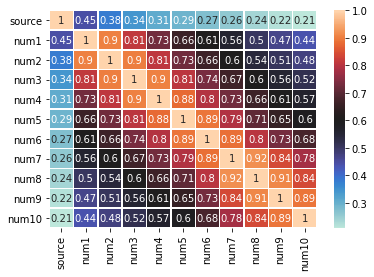

In [ ]:
# Importamos otra paqueteria para manipulacion de datos, con ella hacemos una grafica de correlacion
import seaborn as sns
fig = sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.5) #df_train.corr()-->correlation matrix

 Como vemos nuestro dataframe no tiene ninguna columna que no tenga datos numericos,
 ademas de no tener ningun dato nulo en sus columnas ni tener columnas que esten fuertemente correlacionadas.


In [ ]:
 #Se separan los datos en aquellos que son las variables de entrada (features) y la columna
 #que proporciona la informacion de clasificacion (target).
import numpy as np

X_df = df
X_df = X_df.drop(['source'], axis=1)
Y_df = df['source']


In [ ]:
# Se separan los datos en 75% entrenamiento (train) y 25% prueba (test).
# Importamos paqueteria para realizar la separacion.

from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(X_df, Y_df, test_size = 0.25, random_state = 42)



y_tr = np.asarray(y_tr, dtype = np.int)
y_ts = np.asarray(y_ts, dtype = np.int)

y_tr = np.reshape(y_tr, [6750,1])
y_ts = np.reshape(y_ts, [2250,1])


print(x_ts.shape)
print(x_tr.shape)
print(y_ts.shape)
print(y_tr.shape)

(2250, 10)
(6750, 10)
(2250, 1)
(6750, 1)


In [ ]:
# Normalizamos los datos, para usarlos en la red neuronal.

from sklearn.preprocessing import MinMaxScaler, Normalizer

# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :")
print(x_tr)

print(" ")
print(" ")

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :")
print(x_ts)


Training Data :
[[5.12214439e-01 3.07302618e-01 1.92064581e-01 ... 3.72294726e-02
  4.65368408e-02 3.32406006e-02]
 [5.88300910e-02 7.06558182e-03 8.84033212e-04 ... 5.50944308e-08
  1.37865796e-08 1.97136451e-09]
 [6.69284312e-05 1.33843187e-06 1.17112651e-06 ... 3.11326601e-11
  5.18877668e-12 0.00000000e+00]
 ...
 [7.40563091e-02 4.44345995e-02 2.77722614e-02 ... 5.38335579e-03
  6.72919475e-03 4.80656768e-03]
 [8.78826075e-01 2.10898048e-01 2.63622251e-02 ... 3.97356466e-04
  5.96034712e-04 8.51478160e-05]
 [3.75457344e-01 4.50502782e-02 2.25256146e-02 ... 6.79055608e-04
  6.79055616e-04 1.94015891e-04]]
 
 
Testing Data :
[[2.45177010e-01 1.40634732e-01 1.94589862e-02 ... 7.01312731e-03
  9.01687798e-03 2.24819722e-02]
 [5.19792617e-02 5.96800049e-03 8.26824577e-04 ... 6.80042778e-08
  9.72108203e-09 3.03229265e-09]
 [4.82410271e-02 5.54043844e-03 7.67488170e-04 ... 6.30829156e-08
  9.02215376e-09 2.81510365e-09]
 ...
 [4.69838232e-02 5.40132123e-03 7.48592350e-04 ... 6.16108366e-

In [ ]:
# Al tener mas de dos categorias se necesita convertir nuestros valores de la columna target a arrays a esto se le llama:
# ONE-HOT encoding. 
from keras.utils import np_utils
n_classes = 5
y_tr = np_utils.to_categorical(y_tr,n_classes)  
y_ts = np_utils.to_categorical(y_ts,n_classes)

print("Training Data: ")
print(y_tr)

print(" ")
print(" ")

print("Testing Data: ")
print(y_ts)

Training Data: 
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
 
 
Testing Data: 
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


## Red neuronal:

In [ ]:
import tensorflow as tf
import keras 
# La mayoria de las redes neuronales funcionan con capas ocultas una despues de la otra, de forma lineal
# para crear la red en estas redes neuronales se usa los modelos sequenciales.
from keras.models import Sequential 
# Las redes neuronales donde todos los inputs y nodes estan conectados a todos los nodos siguientes se les llaman
# redes neuronales densas.
from keras.layers import Dense
from matplotlib import pyplot as plt
# Linea para usar el comando dropout.
from keras.layers import Dropout 
# Linea para habitar el callback que nos permite parar el entrenamiento si un parametro no mejora en un intervalo definido.
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

# Hyperparameteros
training_epochs = 500 #Numero de iteraciones.
in_dim = 10 # Numero de variables de entrada.
out_dim = 5 # Numero de variables de salida.


# create a model
def create_model():
    model = tf.keras.Sequential()

    # Capas ocultas.
    model.add(tf.keras.layers.Dense(25, input_dim= in_dim,activation='sigmoid'))
    
   
    model.add(tf.keras.layers.Dense(15,activation='softsign'))
    


    model.add(tf.keras.layers.Dense(15,activation='relu'))
    model.add(Dropout(0.4))

    # Capa de salida.
    model.add(tf.keras.layers.Dense(out_dim, activation='softmax'))

    # Compilamos el modelo.
    model.compile(loss='categorical_crossentropy', 
                  optimizer= 'adam',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()


results = model.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    batch_size = 130,
    validation_data = (x_ts, y_ts),
    verbose = 0
)

# Impresion de resultados y graficas.

print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(x_tr, y_tr, verbose=0)
print("loss:{:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(x_ts, y_ts, verbose=0)
print("loss:{:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                275       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 80        
Total params: 985
Trainable params: 985
Non-trainable params: 0
_________________________________________________________________


NameError: ignored

In [ ]:
# Si no puedes entrenar tu modelo en este momento o en esta compu y lo quieres guardare entonces:

model.save('EvalParcial_SFC.h5')

# Y cuando lo quieras volver a cargar:

#from keras.models import load_model

#pretrained_model = load_model('EvalParcial_SFC.h5')

# Concluciones:

## Interpretacion de los resultados:
La red neruonal entrenada en este trabajo tuvo resultados negativos. Su accuracy tenia una asintota en el 80%, su error rondaba en 0.38 generalmente. Lo unico favorable es que la diferencia entre los resultados entre los datos de entrenamiento y de prueba eran muy pequeña.

Mejores resultados que se obtuvieron:


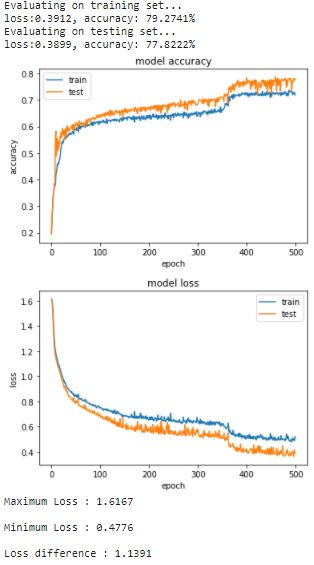


Estos resultados se dieron por mis limitaciones tanto tecnicas como de conocimiento. Principalmente pienso que la red neuronal que se debia aplicar a los datos tenia que ser diferente para mejorar el accuracy pero salia de lo visto en clase. Con lo antes mecionado y teniendo un ordenadar con mejores especificaciones que me permitiere usar todos los datos del dataset ademas de no tardar tanto al compilar para permitirme hacer mas pruebas creo que hubiera conseguido datos favorables. No descarto que a lo mejor el problema son los datos pero se me hace lo menos probable.



## Aprendizaje del entrenamiento:

En este apartado expongo las conclusiones que llegue al estar variando los parametros en el entrenamiento de la red neuronal.

*   Al principio no use ONE-HOT encoding, y mis resultados tenian una asintota en 40%, usando ONE-HOT encoding subio a 80%.

*   Sample: Mis datos tienen 500001 entradas, las cuales no use todas por limitaciones tecnicas y de tiempo, pero me di cuenta que al menos en el rango de 3000 y 15000 no percibi diferencia en mis resultados.

*   Epochs: Con estos datos las epochs que mas funcionaban eran al rededor de 500, que era cuando llegaba el accuracy a 80%. Despues de eso no importaba si le daba 1000 o 2000, mas no intente por las limitaciones.

*   Batch: El overfitting se acentuaba cuando subia de 150 y bajaba de 30.
*   Capas ocultas: Poner mas de 3 capas no presentaba cambios significativos en mis resultados.


*   Funciones de activacion: Intente diferentes combinaciones de las funciones de activacion en mis 3 capas ocultas, para ser mas preciso fueron sigmoid, elu,relu, tanh y softsign. Las que mejoraban los resultados drasticamente al usarlas fueron sigmoid y softsign, siendo la que mas los empeoraban tanh.


*   Nodos: Tener entre 12 y 30 nodos en las capas ocultados fue lo que mejor me dio resultados, al subir o bajar de ese numero se presentaba una disminucion de accuracy ademas de overfitting. Por ultimo al usar dropout generalmente empeoraba el overfitting o el accuracy, excepto en la capa oculta con funcion relu, pero tenia que tener un porcentaje bajo de dropout alrededor de 0.4.

Por lo que la mejor combinacion que puede encontrar fue:



```

#Numero de iteraciones:

training_epochs = 500 


# Capas ocultas:

    # 1.

model.add(tf.keras.layers.Dense(25, input_dim= in_dim,activation='sigmoid'))

    # 2.
   
model.add(tf.keras.layers.Dense(15,activation='softsign'))
   
    # 3.

model.add(tf.keras.layers.Dense(15,activation='relu'))
model.add(Dropout(0.4))

# Batch:

    batch_size = 130

```

## Posibles aplicaciones:

Encuentro factible el poder usar esta red neruonal, claro si hubiera dado resultados buenos, para clasificar productos por sus especificaciones, por ejemplo marcas de computadoras, tipos de comidas, paises entre otras clasificaciones que tengas varias caracteristicas especificas.